In [157]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
#define working directory
#So we dont have to explicitly define the path while importing the dataset and all the outputs will be stored is this directory
os.chdir('C:/Users/Admin/Desktop/KAGGLE')

In [162]:
#import dataset
data_youtube = pd.read_csv('data.csv')

In [164]:
#Printing heads of the dataset
data_youtube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [165]:
#data basic info
data_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [166]:
# Size of the dataset
data_youtube.shape

(5000, 6)

In [167]:
# Basic statistics of the data.
# Video Uploads and Subscribers have object datatype.
data_youtube.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


In [168]:
data_youtube.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [169]:
# Video Uploads has object datatype
data_youtube['Video Uploads'].dtype

dtype('O')

In [170]:
# Subscribers has object datatype
data_youtube['Subscribers'].dtype

dtype('O')

In [171]:
# Video views has interger datatype
data_youtube['Video views'].dtype

dtype('int64')

In [172]:
data_youtube['Subscribers'].value_counts()
# This fucntion returns the total number of values repeted in the dataset, now '--' has the max value of repetation as it has the n
# missing value.

--          387
666561        2
92158         2
820317        1
4390622       1
673261        1
2903276       1
988733        1
1687547       1
889995        1
595068        1
3392050       1
2719453       1
451579        1
4512030       1
5165839       1
2028586       1
339526        1
1707789       1
320015        1
1219171       1
107229        1
85910         1
337135        1
1031787       1
1247922       1
22331643      1
3600345       1
229717        1
4001717       1
           ... 
1047248       1
51071         1
970112        1
3214966       1
3954908       1
2326062       1
133598        1
1597666       1
4184884       1
2504451       1
2398247       1
4246526       1
136538        1
240168        1
988900        1
354484        1
1436586       1
2075952       1
67777         1
51859         1
891366        1
3566275       1
448155        1
3619657       1
746287        1
2423804       1
1246052       1
963770        1
1884592       1
318576        1
Name: Subscribers, Lengt

In [173]:
# Lets skip the rows which has missing values. I am not replacing these values with mean because it might lead to less variance
# the data.

In [174]:
data_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [175]:
# I am creating a new dataframe which does not contain the missing values
missing_values = data_youtube['Subscribers'].value_counts().index[0]
data_yt_1 = data_youtube[data_youtube['Subscribers'] != missing_values]
data_yt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4613 entries, 0 to 4999
Data columns (total 6 columns):
Rank             4613 non-null object
Grade            4613 non-null object
Channel name     4613 non-null object
Video Uploads    4613 non-null object
Subscribers      4613 non-null object
Video views      4613 non-null int64
dtypes: int64(1), object(5)
memory usage: 252.3+ KB


In [176]:
# Now, lets convert the Subscribers data to intergers.
data_yt_1['Subscribers'] = pd.to_numeric(data_yt_1['Subscribers'])
data_yt_1.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Subscribers,Video views
count,4.613000e+03,4.613000e+03
mean,2.620004e+06,1.137713e+09
std,3.926447e+06,2.068211e+09
min,3.010000e+02,7.500000e+01
25%,6.098940e+05,2.188379e+08
50%,1.350477e+06,5.365047e+08
75%,2.950056e+06,1.194442e+09
max,6.599531e+07,4.754884e+10


In [177]:
data_yt_1['Subscribers'].dtype

dtype('int64')

In [178]:
data_yt_1.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [179]:
# Lets remove missing values in Video Uploads.


In [180]:
data_youtube['Video Uploads'].value_counts(ascending=True)

6977       1
151597     1
2053       1
717        1
1383       1
1494       1
2154       1
1483       1
1489       1
2923       1
22207      1
9289       1
96996      1
42027      1
2985       1
753        1
1936       1
2898       1
677        1
684        1
5904       1
8948       1
3964       1
1158       1
8055       1
2498       1
670        1
1934       1
427        1
894        1
          ..
83        11
92        11
136       11
87        11
98        12
47        12
38        12
19        12
43        12
66        12
39        12
99        12
12        12
50        13
235       13
72        13
2         13
104       13
55        14
69        14
27        14
36        14
68        14
30        15
21        15
8         16
84        16
52        16
26        17
20        17
Name: Video Uploads, Length: 2286, dtype: int64

In [181]:
data_yt_1.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [182]:
data_yt_1['Video Uploads'].head()

0    82757
1    12661
2      373
3    27323
4    36756
Name: Video Uploads, dtype: object

In [183]:
data_yt_1['Video Uploads'].dtype

dtype('O')

In [184]:
# The following line replaces the missing value with NaN and it drops the row.

In [185]:
data_final = data_yt_1.replace('--', np.nan).dropna()

In [186]:
data_final.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [187]:
data_final['Video Uploads'].dtype

dtype('O')

In [188]:
# This fuctions converts the object value to interger value.
data_final['Video Uploads'] = pd.to_numeric(data_final['Video Uploads'])

In [189]:
data_final['Video Uploads'].dtype

dtype('int64')

In [190]:
data_final.describe()

,Video Uploads,Subscribers,Video views
count,4610.000000,4.610000e+03,4.610000e+03
mean,4085.745987,2.621527e+06,1.138403e+09
std,17726.160260,3.927263e+06,2.068706e+09
min,1.000000,3.010000e+02,7.500000e+01
25%,148.000000,6.101925e+05,2.189184e+08
50%,464.000000,1.350884e+06,5.368886e+08
75%,1592.500000,2.950921e+06,1.195115e+09
max,422326.000000,6.599531e+07,4.754884e+10


In [191]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
Rank             4610 non-null object
Grade            4610 non-null object
Channel name     4610 non-null object
Video Uploads    4610 non-null int64
Subscribers      4610 non-null int64
Video views      4610 non-null int64
dtypes: int64(3), object(3)
memory usage: 252.1+ KB


In [192]:
# AT THIS POINT, THE DATA HAS NO MISSING VALUES AND THE LAST THREE COLUMS ARE OF INT, SO WE ARE GOOD TO GO FOR DATA VISUALIZATION

In [193]:
# Next step is to detect and remove Outliners.

In [194]:
data_final.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [195]:
a = data_final['Video Uploads'].max() 
b = data_final['Video Uploads'].min() 
c = data_final['Video Uploads'].mean() 
print(a,b,c)

422326 1 4085.7459869848158


In [196]:
d = data_final['Subscribers'].max()
e = data_final['Subscribers'].min()
f = data_final['Subscribers'].mean()
print(d,e,f)

65995310 301 2621527.220173536


In [197]:
g = data_final['Video views'].max()
h = data_final['Video views'].min()
i = data_final['Video views'].mean()
print(g,h,i)

47548839843 75 1138403081.178959


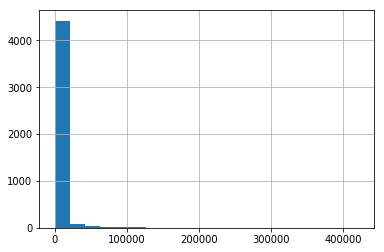

In [198]:
# NOW LET PLOT THE HISTOGRAM OF VIDEO UPLOADS
data_final['Video Uploads'].hist(bins=20)

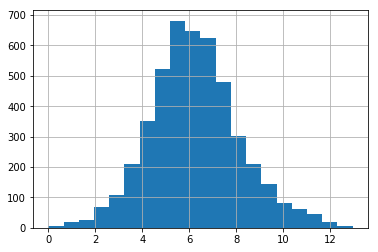

In [199]:
# The graph is left skewed, so we are using log to make it centered.
data_final_vu_log = np.log(data_final['Video Uploads'])
data_final_vu_log.hist(bins=20)

In [200]:
# We are also using sqrt and cbrt to compare the result of all the three resultant dataset.
data_final_vu_sqrt = np.sqrt(data_final['Video Uploads'])
data_final_vu_cbrt = np.cbrt(data_final['Video Uploads'])

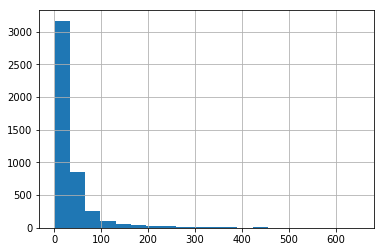

In [201]:
data_final_vu_sqrt.hist(bins=20)

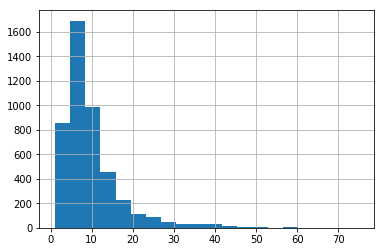

In [202]:
data_final_vu_cbrt.hist(bins=20)

In [203]:
x = data_final_vu_log.mean()
y = data_final_vu_sqrt.mean()
z = data_final_vu_cbrt.mean()
print(x,y,z)

6.242111909659032 37.3898801393849 9.939344506315948


In [204]:
# By this result we can say that the after taking log of all the values in Video Uplad Columns, the graph is centered.

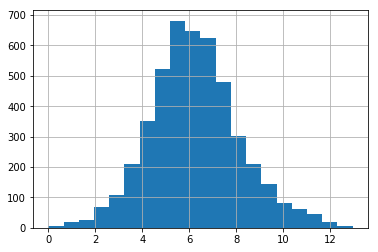

In [205]:
data_final_vu_log.hist(bins=20)

In [206]:
# WE DID NOT FIND ANY OUTLINERS IN THE COLUMN VIDEO UPLOADS.

In [207]:
# NOW LETS TRY TO FIND THE OUTLINERS IN SUBSCRIBERS COLUMN.

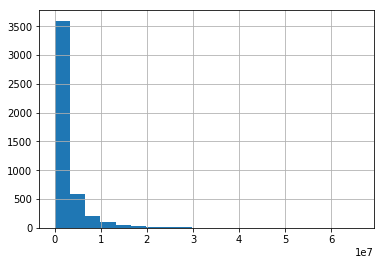

In [208]:
# NOW LET PLOT THE HISTOGRAM OF SUBSCRIBERS
data_final['Subscribers'].hist(bins=20)#

In [209]:
#  The graph is left skewed, let try to use log, sqrt, cbrt of all the values and then plot the graph.
data_final_s_log = np.log(data_final['Subscribers'])
data_final_s_sqrt = np.sqrt(data_final['Subscribers'])
data_final_s_cbrt = np.cbrt(data_final['Subscribers'])


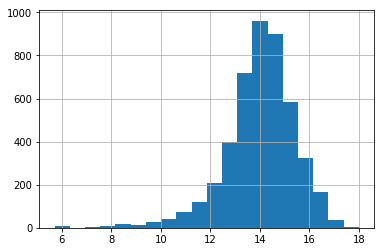

In [211]:
data_final_s_log.hist(bins=20)

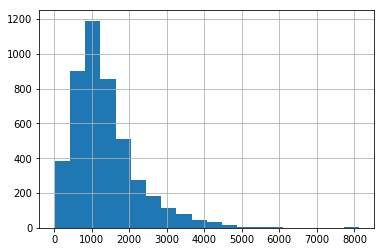

In [212]:
data_final_s_sqrt.hist(bins=20)

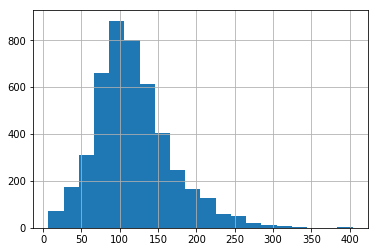

In [213]:
data_final_s_cbrt.hist(bins=20)

In [214]:
# WE CAN CLEARLY SEE THAT THE ABOVE GRAPHY IS LESS SKEWED WHEN THE VALUES ARE CUBE ROOTED.

In [215]:
# Now, let compare the mean value of all the results
t = data_final_s_log.mean()
u = data_final_s_sqrt.mean()
v = data_final_s_cbrt.mean()
print(t,u,v)

14.006978029124982 1361.4805197929415 117.6945024789841


In [216]:
data_final['Subscribers'].max()

65995310

In [217]:
data_final['Subscribers'].min()

301

In [218]:
data_final['Subscribers'].mean()

2621527.220173536

In [219]:
data_final.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


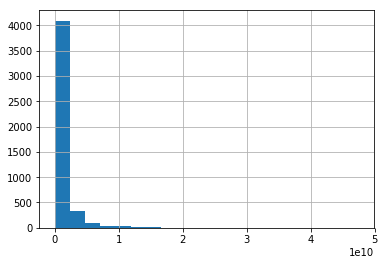

In [220]:
# NOW LET PLOT THE HISTOGRAM OF Video views
data_final['Video views'].hist(bins=20)#

In [221]:
#  The graph is left skewed, let try to use log, sqrt, cbrt of all the values and then plot the graph.
data_final_vv_log = np.log(data_final['Video views'])
data_final_vv_sqrt = np.sqrt(data_final['Video views'])
data_final_vv_cbrt = np.cbrt(data_final['Video views'])


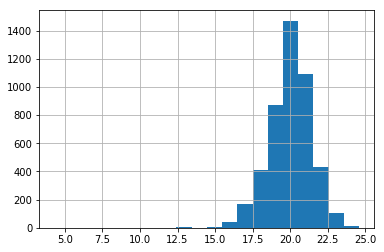

In [222]:
data_final_vv_log.hist(bins=20)

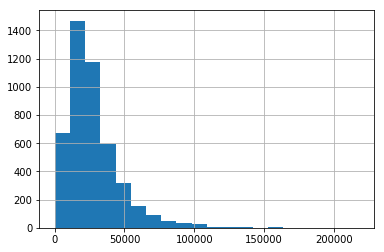

In [223]:
data_final_vv_sqrt.hist(bins=20)

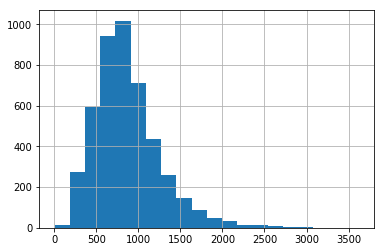

In [224]:
data_final_vv_cbrt.hist(bins=20)

In [225]:
# Now, let compare the mean value of all the results
j = data_final_vv_log.mean()
k = data_final_vv_sqrt.mean()
l = data_final_vv_cbrt.mean()
print(j,k,l)

19.990468643230304 27540.3236714309 869.381187959914


In [226]:
# WE CAN CLEARLY SEE THAT THE GRAPHS OF VIDEO VIEWS IS LESS SKEWED WHEN LOG OF ALL VALUES ARE USED.

In [227]:
# lETS CHECK THE HITOGRAM OF THE ALL THE GIVEN COLUMNS

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AF49FD0>,
      dtype=object)

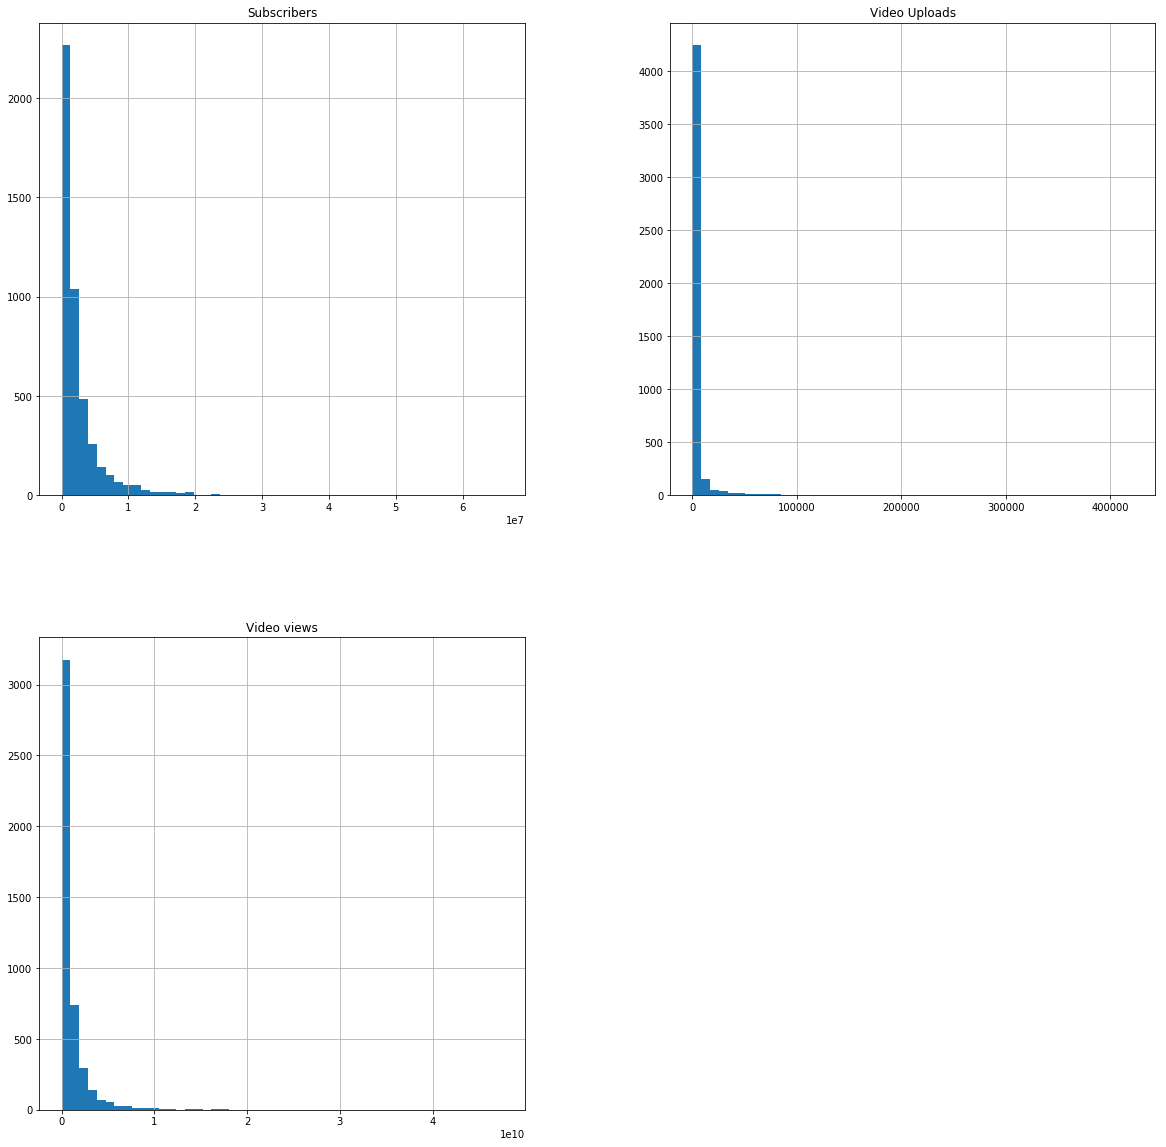

In [228]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20, 20))
data_final.hist(bins = 50, ax = ax)

In [229]:
# Thus the distribution is quite skewed, many channels (>2000) in the dataset have < 1.25e6 subscribers, 
# majority of the channels have video uploads much less than 100000, and also <3000 channels have views much less than 1e10.

In [230]:
# The top 50 subscribed channels on Youtube are:

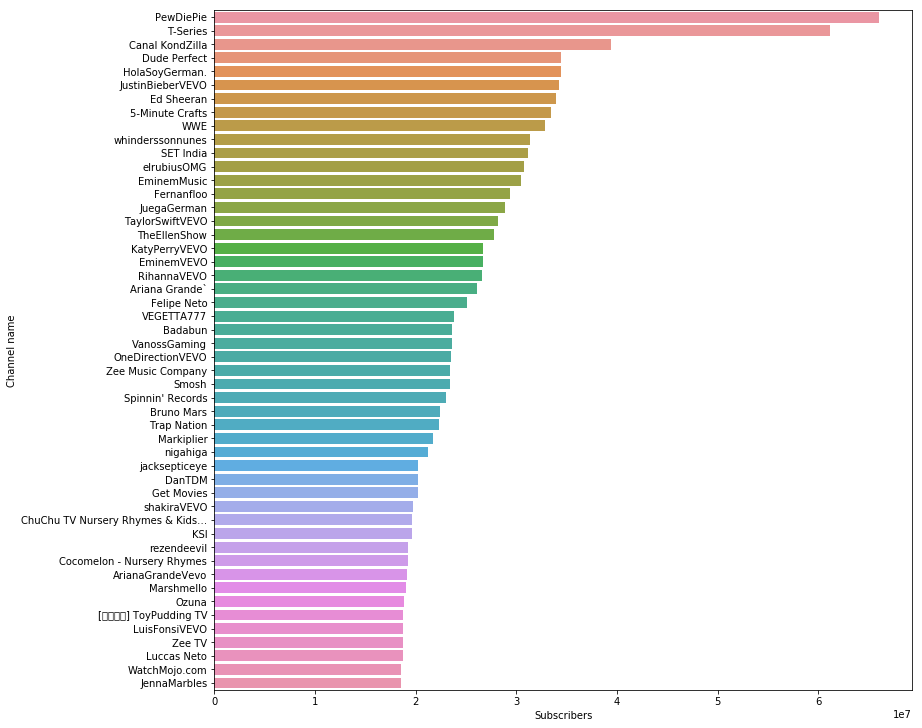

In [231]:
import seaborn as sns
df_subs_and_channels_top_50 = data_final[['Channel name', 'Subscribers']].sort_values('Subscribers', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (12.5, 12.5))
sns.barplot(y = 'Channel name', x = 'Subscribers', data = df_subs_and_channels_top_50, orient = 'h',ax = ax)

In [232]:
# Top 50 channels with most views are:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


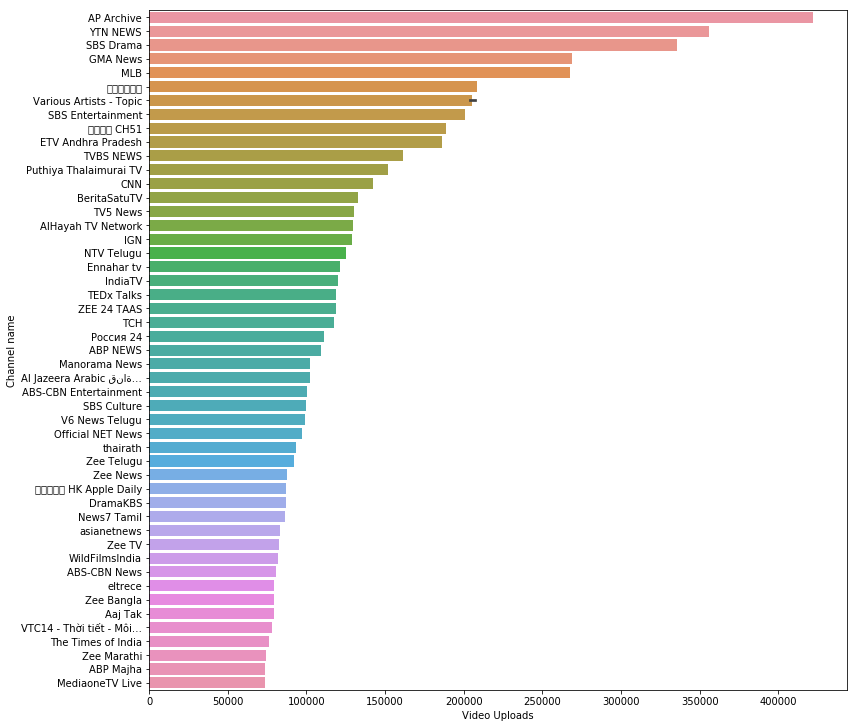

In [233]:
df_views_and_channels_top_50 = data_final[['Channel name', 'Video Uploads']].sort_values('Video Uploads', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (12.5, 12.5))
sns.barplot(y = 'Channel name', x = 'Video Uploads', data = df_views_and_channels_top_50, orient = 'h',ax = ax)

In [234]:
# Next we find out the distribution of grades:

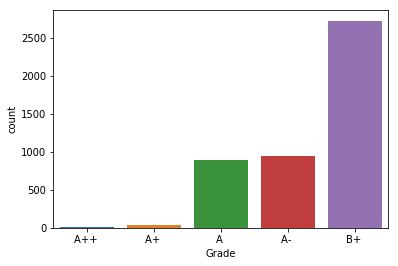

In [235]:
import seaborn as sns
sns.countplot(data_final['Grade'])

In [236]:
# Thus, maximum channel have B+ grade.

In [237]:
# Now, let's see the relationship between the rank and grade of a channel.

In [238]:
data_rank_grade = data_final[['Rank', 'Grade']]

In [239]:
# Let's observe the rank distribution of the data_rank_grade dataframe. 
# Let's convert the Rank series of 'data_rank_grade' to int so analysis becomes easier.

In [240]:
l = list(data_rank_grade['Rank'])
rank_list = [i.split(',')[0] + i.split(',')[1] if i[1] == ',' else i[:-2] for i in l]
final_list = [i[:-2] if len(i) == 6 else i for i in rank_list]
int_rank_series = pd.DataFrame(final_list, columns = ['Rank'], dtype = int)
data_rank_grade = data_rank_grade.drop('Rank', axis = 1)
data_rank_grade_new = pd.concat([data_rank_grade, int_rank_series], axis = 1)
data_rank_grade_new.head()

,Grade,Rank
0,A++,1.0
1,A++,2.0
2,A++,3.0
3,A++,4.0
4,A++,5.0


In [241]:
# Let's see the relationship between the columns via a boxplot.

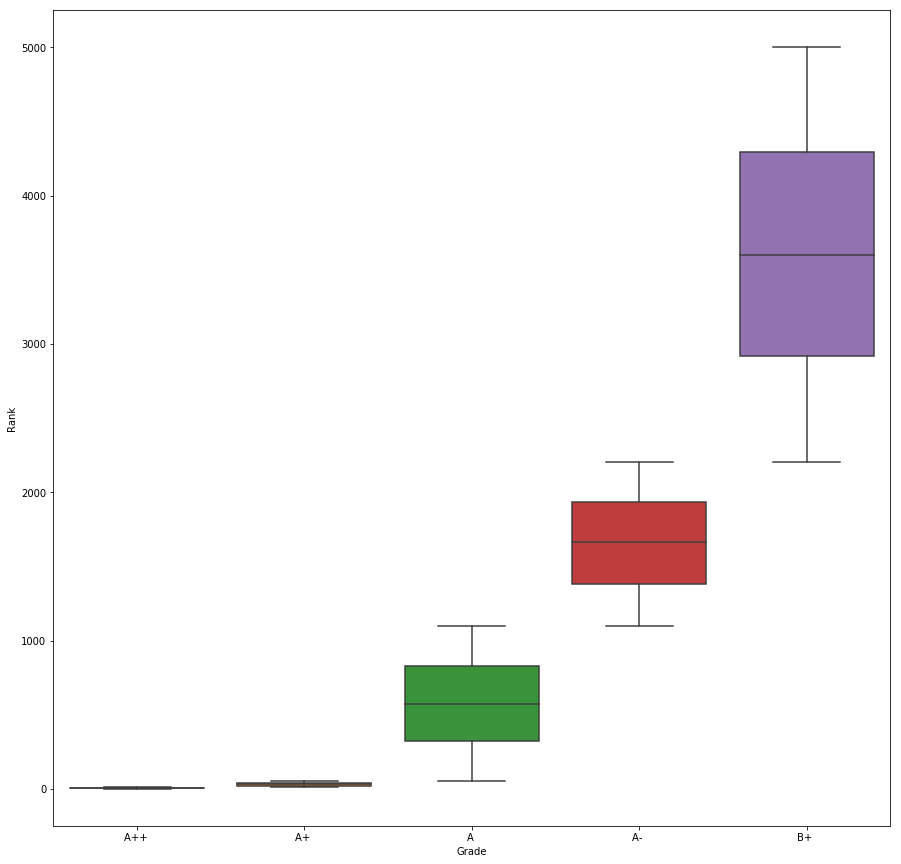

In [242]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x = 'Grade', y = 'Rank', data = data_rank_grade_new, ax = ax)

In [243]:
# By this we can clearly understand that there is a very good demarcation between various grades of channels based on their 
# ranks, thus, the ranks of channels are very good indicators of grade of a channel.

In [244]:
# By reviewing the Boxplot, I observed the following:
# -> B+ Grade Channel - ~3500
# -> A- Grade Channel - ~1500
# -> A Grade Channel  - ~700
# -> A+ Grade Channel - ~80-100

In [245]:
data_rank_grade_new[data_rank_grade_new['Grade'] == 'A++ ']

,Grade,Rank
0,A++,1.0
1,A++,2.0
2,A++,3.0
3,A++,4.0
4,A++,5.0
5,A++,6.0
6,A++,7.0
7,A++,8.0
8,A++,9.0
9,A++,10.0


In [246]:
# Only top 10 channels have A++ grade.

In [247]:
# Relationship between GRADE AND SUBSCRIBERS.

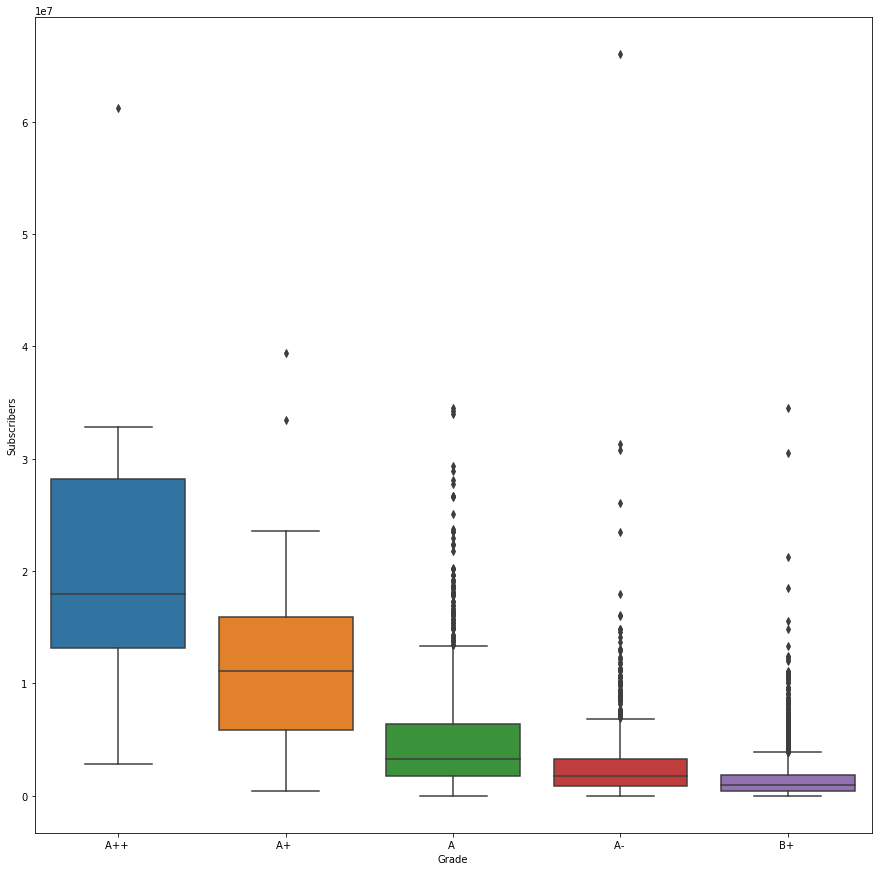

In [248]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x = 'Grade', y = 'Subscribers', data = data_final)   

In [249]:
# Observations :
# -> Lot of overlaps between the boxes of the grades.
# -> Lot of Outliners.
# -> Subscribers is not a good indicator of the Channel's Grade.

In [250]:
# Comparison between Subscribers and Rank of the channels.

Text(0,0.5,'Number of Subscribers.')

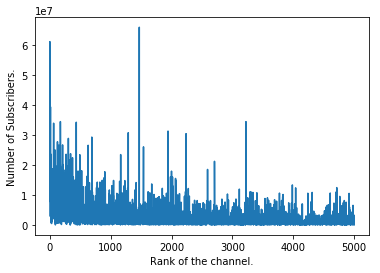

In [251]:
data_final['Subscribers'].plot()
plt.xlabel('Rank of the channel.')
plt.ylabel('Number of Subscribers.')

In [252]:
# Observations
# -> Channels are not ranked accorning to the number of subscribers.

In [253]:
# Comparison between Rank and Video Uploads.

Text(0,0.5,'Number of uploaded videos.')

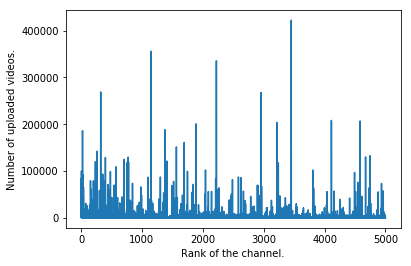

In [254]:
data_final['Video Uploads'].plot()
plt.xlabel('Rank of the channel.')
plt.ylabel('Number of uploaded videos.')

In [255]:
# Observations:
# -> Rank does not depend upon number of videos uploaded.

In [256]:
# Comparison between Grade and Video Uploads.

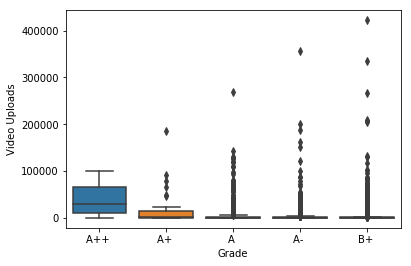

In [257]:
sns.boxplot(x = 'Grade', y = 'Video Uploads', data = data_final)

In [258]:
# Obervations:
# -> Grade of the channel does not depends upon the number of videos uploaded.

In [259]:
# Comparison between Rank and Video Views.

Text(0,0.5,'Total number of views')

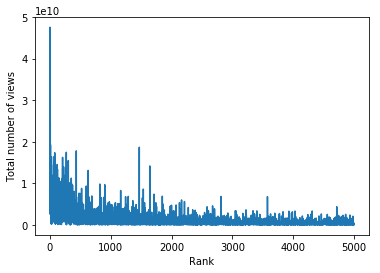

In [260]:
data_final['Video views'].plot()
plt.xlabel('Rank')
plt.ylabel('Total number of views')

In [261]:
# Observations: 
# -> Rank of the channel DOES depends upen the number of views.
# -> There are few exceptions.

In [262]:
# Comparison between Grade and Video Views.

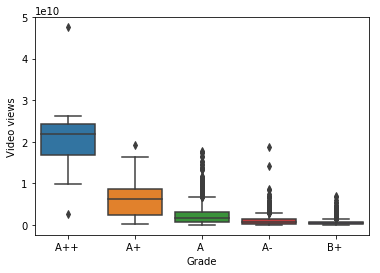

In [263]:
sns.boxplot(x = 'Grade', y = 'Video views', data = data_final)

In [264]:
# Observations:
# -> Grades positively depends upen the number of views.

In [265]:
# Comparison among all the continous variables i.e. Video Views and Subscribers.

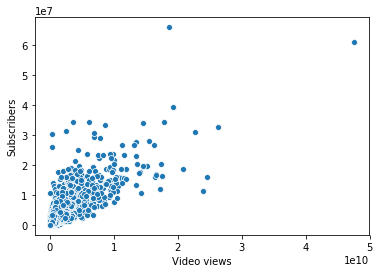

In [266]:
sns.scatterplot(x = 'Video views', y = 'Subscribers', data = data_final)

In [267]:
# Obervations: 
# -> More Video Views means more number of Subscribers.
# -> Relationship is Linear.

In [268]:
# Mathematical Relationship between Video Views and Subscribers.

In [269]:
corr_coef = np.corrcoef(x = data_final['Video views'], y = data_final['Subscribers'])
corr_coef

array([[1.        , 0.79124115],
       [0.79124115, 1.        ]])

In [270]:
# Observation:
# -> Positive Correlation.

In [271]:
# Comparison between Subscribers and Video Uploads.

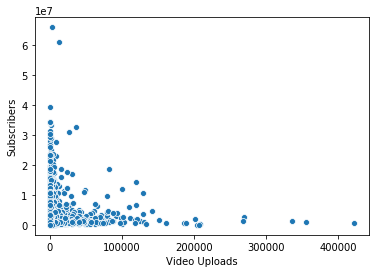

In [272]:
sns.scatterplot(x = 'Video Uploads', y = 'Subscribers', data = data_final)

In [273]:
# Obervations:
# -> No Strong Relationship.
# -> Large Variance.

In [274]:
# Mathematical Relation between Subscribers and Video Uploads.

In [275]:
corr_coef = np.corrcoef(x = data_final['Video Uploads'], y = data_final['Subscribers'])
corr_coef

array([[1.        , 0.01136205],
       [0.01136205, 1.        ]])

In [276]:
# Observations:
# -> Poor Correlation

In [277]:
# Comparison between Video Views and Video Uploads.

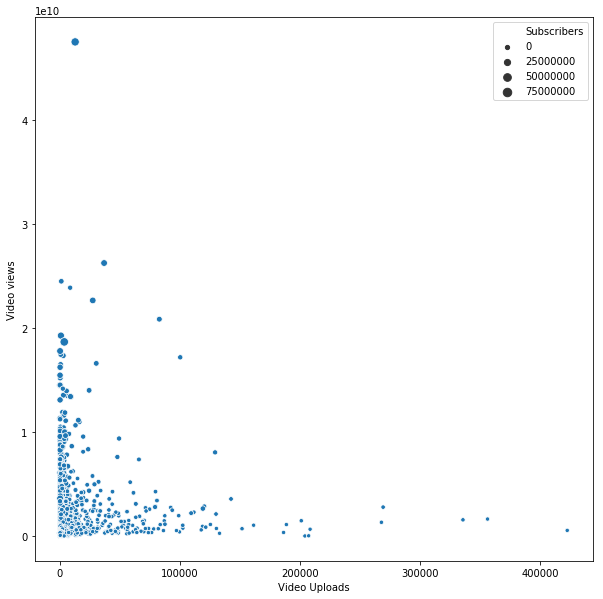

In [278]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = 'Video Uploads', y = 'Video views', size = 'Subscribers', data = data_final, ax = ax)

In [279]:
# Obervations:
# -> Not Strongly Linear.

In [280]:
# I have crated a new variable "Views per Upload" for a better analysis.

In [281]:
data_final['Views per Upload'] = data_final['Video views'] / data_final['Video Uploads']
data_final['Views per Upload'].head()

0    2.521815e+05
1    3.755536e+06
2    2.625551e+07
3    8.299216e+05
4    7.148130e+05
Name: Views per Upload, dtype: float64

In [282]:
# Comparison between Subscribers and Views per Upload.

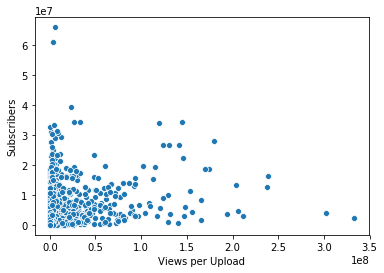

In [283]:
sns.scatterplot(x = 'Views per Upload', y = 'Subscribers', data = data_final)

In [284]:
# Obervations:
# -> Strong Relationship between number of Subscribers and Views per Upload.


In [285]:
corr_coef = np.corrcoef(x = data_final['Views per Upload'], y = data_final['Subscribers'])
corr_coef

array([[1.        , 0.28938596],
       [0.28938596, 1.        ]])

In [286]:
# Obervations: 
# -> Views per Upload have better correlation with Subscribers, and can be used to predict the subscribers.

In [287]:
# Thus here are my final analysis: 

# 1) Rank of the channels are good indicator of the grades of the channels.
# 2) Grades of the channels are not depended upon the subscribers of the channels.
# 3) Rank can be predicted by the number of views of the videos.
# 4) Grades are positively depended upon the number of views of the videos.
# 5) Number of Subscribers are positively depended upon the number of Video Views.
# 6) No strong relationship between the number of Subscribers and number of Video Uploads.
# 7) Number of subscribers are positively depended upon the Views Per Upload.